# Краткое описание проекта

Легенда:\
Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.


Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.


Вам предстоит изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

**Описание данных**
В вашем распоряжении три датасета.

Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта\
Структура visits_info_short.csv:
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.


Файл orders_info_short.csv — информация о заказах\
Структура orders_info_short.csv:
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.

Файл costs_info_short.csv — информация о расходах на рекламу\
Структура costs_info_short.csv:
- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.

### Загрузите данные и подготовьте их к анализу

*инструкция*

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
#импортируем библиотеки

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
#загружаем данные в переменные

visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'), #посещения
    pd.read_csv('/datasets/orders_info_short.csv'), #заказы
    pd.read_csv('/datasets/costs_info_short.csv'), #расходы на рекламу
)

#### Изучим и преобразуем датасет с информацией о посещениях сайта

In [3]:
#информация о посещениях сайта

visits.info()
visits.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
#приведение названий столбцов к единому регистру

visits.columns = ['user_id', 'region', 'device', 'channel',\
                  'session_start', 'session_end']
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Пропусков в датасете нет. Проверим наличие явных дубликатов:

In [5]:
#проверка на явные дубликаты

visits.duplicated().sum()

0

Преобразуем даты в столбцах с данными о начале о окончании сессии:

In [6]:
#преобразование данных о времени

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


#### Изучим и преобразуем датасет с информацией о заказах

In [7]:
#информация о заказах

orders.info()
orders.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [8]:
#приведение названий столбцов к единому регистру

orders.columns = ['user_id', 'event_dt', 'revenue']
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [9]:
#проверка на явные дубликаты

orders.duplicated().sum()

0

In [10]:
#преобразование данных о времени

orders['event_dt'] = pd.to_datetime(orders['event_dt'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


Проверим данные о выручке на наличие выбросов:

In [11]:
#описание данных о выручке

orders['revenue'].describe()

count    40212.000000
mean         5.370608
std          3.454208
min          4.990000
25%          4.990000
50%          4.990000
75%          4.990000
max         49.990000
Name: revenue, dtype: float64

Среднее - 5.73, медиана 4.99, числа расположены близко, что говорит о том, что массовых выбросов нет. Квантили равны 4.99 и равны между собой, возможно это фиксированная плата или стоимость подписки.

#### Изучим и преобразуем датасет с информацией о расходах на рекламу

In [12]:
#информация о расходах на рекламу

costs.info()
costs.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [13]:
#приведение названий столбцов к единому регистру

costs.columns = ['dt', 'channel', 'costs']
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [14]:
#проверка на явные дубликаты

costs.duplicated().sum()

0

In [15]:
#преобразование данных о времени

costs['dt'] = pd.to_datetime(costs['dt'])
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


In [16]:
#описание данных о стоимости реклам

costs['costs'].describe()

count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64

Информация похожа на правду - стоимость рекламы может быть разной.

Мы провели подготовку данных к анализу: преобразовали названия столбцов и типы данных в них, проверили на наличие дубликатов, получили описание данных о выручке по заказам и о стоимости реклам, сделали вывод о том, что выбросов в данных нет. Перейдём к дальнейшему анализу.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

*инструкция*

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Зададим функции для вычисления значений метрик:

##### `get_profiles()` — для создания профилей пользователей

In [17]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

##### `get_retention()` — для подсчёта Retention Rate

In [18]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

##### `get_conversion()` — для подсчёта конверсии

In [19]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

##### `get_ltv()` — для подсчёта LTV

In [20]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # что мы здесь делаем???
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 


#### Зададим функции для построения графиков:

#####  `filter_data()` — для сглаживания данных

In [21]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

#####  `plot_retention()` — для построения графика Retention Rate

In [22]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

##### `plot_conversion()` — для построения графика конверсии

In [23]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

##### `plot_ltv_roi` — для визуализации LTV и ROI

In [24]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

*инструкция*

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Профили пользователей

Получим профили пользователей. Для этого вызовем функцию get_profiles(), передав ей данные о посещениях и заказах.

In [25]:
#вызовем функцию get_profiles()

profiles = get_profiles(visits, orders, costs)
print(profiles.head(5)) 

    user_id            first_ts     channel  device         region         dt  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States 2019-05-07   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States 2019-07-09   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France 2019-10-01   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany 2019-08-22   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States 2019-10-02   

       month  payer  acquisition_cost  
0 2019-05-01   True          1.088172  
1 2019-07-01  False          1.107237  
2 2019-10-01  False          0.000000  
3 2019-08-01  False          0.988235  
4 2019-10-01  False          0.230769  


In [26]:
#определим минимальную и максимальную даты привлечения пользователей

first_suitable_acquisition_date = profiles['first_ts'].min()
last_suitable_acquisition_date = profiles['first_ts'].max()

print(first_suitable_acquisition_date)
print(last_suitable_acquisition_date)

2019-05-01 00:00:41
2019-10-27 23:59:04


Теперь у нас есть таблица с профилями пользователей, которая содержит параметры первых посещений и признак платящих пользователей. Горизонт анализа согласно данным с 1 мая 2019 года по 27 октября 2019 года включительно, что соответствует горизонту, указанному в ТЗ.

#### Распределение пользователей по странам

Для того, чтобы узнать, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей, построим сводную таблицу, которая будет отражать количество пользователей всего, количество платящих пользователей и их долю.

In [27]:
#распределение пользователей по странам 

regions =  profiles.pivot_table(index='region', values='payer', aggfunc=['count', 'sum'])
regions.columns = ['count_of_users','count_of_payers']
regions['share'] = round(regions['count_of_payers']/regions['count_of_users'],3)\
                   .map(lambda x: f'{x:,.0%}')
regions = regions.sort_values(by='count_of_payers', ascending=False)

regions

,count_of_users,count_of_payers,share
region,,,
United States,100002,6902,7%
UK,17575,700,4%
France,17450,663,4%
Germany,14981,616,4%


Больше всего пользователей приходится на США, в этой стране бОльшая доля платящих пользователей: 6,9%. Пользователи приходят также из Великобритании, Франции и Германии, но количество пользователей всего, а также доля платящих пользователей значительно ниже (около 4%).

#### Распределение пользователей по устройствам

Для того, чтобы узнать, какими устройствами пользуются клиенты и на какое устройство приходится больше всего платящих пользователей, построим сводную таблицу, которая будет отражать количество пользователей всего, количество платящих пользователей и их долю.

In [28]:
#распределение пользователей по устройствам

devices =  profiles.pivot_table(index='device', values='payer', aggfunc=['count', 'sum'])
devices.columns = ['count_of_users','count_of_payers']
devices['share'] = round(devices['count_of_payers']/devices['count_of_users'],3)\
                    .map(lambda x: f'{x:,.0%}')
devices = devices.sort_values(by='count_of_payers', ascending=False)

devices

,count_of_users,count_of_payers,share
device,,,
iPhone,54479,3382,6%
Android,35032,2050,6%
Mac,30042,1912,6%
PC,30455,1537,5%


Больше всего пользователей используют iPhone, среди них также больше количество платящих пользователей. Однако доля платящих пользователей не самая высокая, первыми идут пользователи Mac (6,4% платящих пользователей), далее iPhone (6,2%), Android (5,9%) и PC (5%).

#### Распределение пользователей по каналам привлечения

Для того, чтобы узнать, с помощью каких рекламных источников привлекаются пользователи и из каких пришло больше всего платящих пользователей, построим сводную таблицу, которая будет отражать количество пользователей всего, количество платящих пользователей и их долю.

In [29]:
#распределение пользователей по каналам привлечения

channels =  profiles.pivot_table(index='channel', values='payer', aggfunc=['count', 'sum'])
channels.columns = ['count_of_users','count_of_payers']
channels['share'] = round(channels['count_of_payers']/channels['count_of_users'],3)\
                    .map(lambda x: f'{x:,.0%}')
channels = channels.sort_values(by='count_of_payers', ascending=False)

channels

,count_of_users,count_of_payers,share
channel,,,
FaceBoom,29144,3557,12%
TipTop,19561,1878,10%
organic,56439,1160,2%
WahooNetBanner,8553,453,5%
AdNonSense,3880,440,11%
RocketSuperAds,4448,352,8%
LeapBob,8553,262,3%
OppleCreativeMedia,8605,233,3%
lambdaMediaAds,2149,225,10%


Для наглядности выведем топ-5 каналов:
- по количеству пользователей в целом:

In [30]:
#топ-5 каналов по количеству пользователей

channels = channels.sort_values(by='count_of_users', ascending=False)
channels.head(5)

,count_of_users,count_of_payers,share
channel,,,
organic,56439,1160,2%
FaceBoom,29144,3557,12%
TipTop,19561,1878,10%
OppleCreativeMedia,8605,233,3%
WahooNetBanner,8553,453,5%


- по количеству платящих пользователей:

In [31]:
#топ-5 каналов по количеству платящих пользователей

channels = channels.sort_values(by='count_of_payers', ascending=False)
channels.head(5)

,count_of_users,count_of_payers,share
channel,,,
FaceBoom,29144,3557,12%
TipTop,19561,1878,10%
organic,56439,1160,2%
WahooNetBanner,8553,453,5%
AdNonSense,3880,440,11%


- по доле платящих пользователей среду общего количества:

In [32]:
#топ-5 каналов по доле платящих пользователей

channels = channels.sort_values(by='share', ascending=False)
channels.head(5)

,count_of_users,count_of_payers,share
channel,,,
RocketSuperAds,4448,352,8%
WahooNetBanner,8553,453,5%
YRabbit,4312,165,4%
MediaTornado,4364,156,4%
LeapBob,8553,262,3%


Больше всего пользователей пришло "органическим" способом, т.е. не через рекламу. Однако платящих пользователей среди них всего 2,1%. \
На втором месте по количеству пользователей канал "FaceBoom", среди них больше всего платящих пользователей - 3557, и, соотвественно, их доля - 12,2%). \
На третьем месте "TipTop", платящих пользователей больше, чем среди "органических" пользователей, но доля не высокая - 9,6%. \
Два канала, которые привлекают бОльший процент платящих пользователей - это "AdNonSense" и "lambdaMediaAds" (11,3% и 10,5% соответственно), но в целом они привлекли не большое общее количество пользователей (3880 и 2149 соответственно).

### Маркетинг

*инструкция*

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Общая сумма расходов на маркетинг

Для того, чтобы рассчитать общую сумму расходов на маркетинг, просуммируем все затраты в таблице "costs". 

In [33]:
#сумма расходов на маркетинг

total_costs = costs['costs'].sum().round(2)
total_costs

105497.3

Сохраним значение в переменной для дальнейшего анализа.

#### Распределение  расходов на маркетинг по рекламным источникам

Подготовим сводную таблицу, чтобы проанализировать распределение расходов по рекламным источникам.

In [34]:
#распределение расходов

costs_per_channel =  costs.pivot_table(index='channel', values='costs', aggfunc='sum')
costs_per_channel['share'] = (costs_per_channel['costs']/total_costs).round(2)\
                            .map(lambda x: f'{x:,.0%}')
costs_per_channel.reset_index()
costs_per_channel.sort_values(by='costs', ascending=False)

,costs,share
channel,,
TipTop,54751.30,52%
FaceBoom,32445.60,31%
WahooNetBanner,5151.00,5%
AdNonSense,3911.25,4%
OppleCreativeMedia,2151.25,2%
RocketSuperAds,1833.00,2%
LeapBob,1797.60,2%
lambdaMediaAds,1557.60,1%
MediaTornado,954.48,1%


Два источника, на которые ушла бОльшая часть расходов, это TipTop и FaceBoom, оба фигурировали в предыдущем пункте анализа. На  TipTop ушло 52% расходов, но ни по количеству, ни по доле платящих пользователей, этот источник не обогнал FaceBoom. Визуализируем расходы.

#### Визуализация динамики изменения расходов во времени

Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.

In [35]:
#добавим неделю и месяц в таблицу с расходами

costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month

costs.head(5)

,dt,channel,costs,week,month
0,2019-05-01,FaceBoom,113.3,18,5
1,2019-05-02,FaceBoom,78.1,18,5
2,2019-05-03,FaceBoom,85.8,18,5
3,2019-05-04,FaceBoom,136.4,18,5
4,2019-05-05,FaceBoom,122.1,18,5


In [36]:
#группировка по рекламным источникам и неделе/месяцу

costs_weekly = costs.pivot_table(index='week', columns ='channel', values='costs', aggfunc='sum')
costs_monthly = costs.pivot_table(index='month', columns ='channel', values='costs', aggfunc='sum')

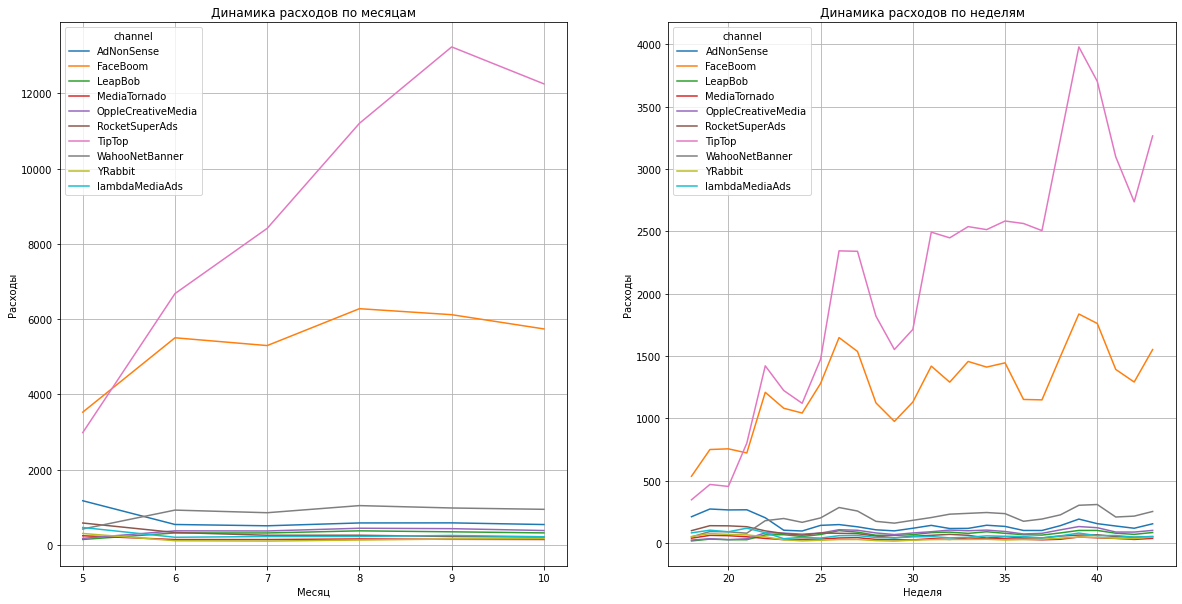

In [37]:
#график изменения расходов по месяцам и неделям

plt.figure(figsize=(20,10))

ax1=plt.subplot(1,2,1)
costs_monthly.plot(grid=True,ax=ax1)
plt.xlabel("Месяц")
plt.ylabel("Расходы")
plt.title('Динамика расходов по месяцам')

ax2=plt.subplot(1,2,2)
costs_weekly.plot(grid=True,ax=ax2)
plt.xlabel("Неделя")
plt.ylabel("Расходы")
plt.title('Динамика расходов по неделям')

plt.show();

На графиках видно, что на рекламные источники TipTop и FaceBoom до 9 месяца или 39-й недели расходы увеличивались, в то время как на прочие источники расходы были равномерные или колебались незначительно. График расходов по месяцам более сглаженный и показывет общую динамику, для детального анализа более подходящим является график по неделям. \
Расходы TipTop и FaceBoom в разные недели колебались сильно,  но происходило это синхронно (расходы увеличивались или уменьшались на каждый источник одновременно). 

#### Стоимость привлечения одного пользователя

Посчитаем количество пользователей и затраты на каждый рекламный источник и рассчитаем стоимость одного пользователя:

In [38]:
#расчет количества пользователей

calculation = (profiles.groupby('channel').agg({'user_id': 'nunique'}))
calculation

,user_id
channel,
AdNonSense,3880
FaceBoom,29144
LeapBob,8553
MediaTornado,4364
OppleCreativeMedia,8605
RocketSuperAds,4448
TipTop,19561
WahooNetBanner,8553
YRabbit,4312


In [39]:
#расчет CAC

cac_per_channel = costs_per_channel.merge(calculation[['user_id']], on='channel', how='left')
cac_per_channel.drop('share', axis=1, inplace=True)
cac_per_channel.columns=['costs','users']
cac_per_channel['CAC'] = (cac_per_channel['costs']/cac_per_channel['users']).round(3)
cac_per_channel = cac_per_channel.sort_values(by='CAC',ascending=False)

cac_per_channel

,costs,users,CAC
channel,,,
TipTop,54751.30,19561,2.799
FaceBoom,32445.60,29144,1.113
AdNonSense,3911.25,3880,1.008
lambdaMediaAds,1557.60,2149,0.725
WahooNetBanner,5151.00,8553,0.602
RocketSuperAds,1833.00,4448,0.412
OppleCreativeMedia,2151.25,8605,0.250
MediaTornado,954.48,4364,0.219
YRabbit,944.22,4312,0.219


Самый "дорогой" пользователь "пришел" с канала TipTop (2,8), в то время как с FaceBoom	пришло почти на 10 тысяч пользователей больше, а стоимость пользователя составляет всего 1,1. Третий канал по стоимости AdNonSense (1,0), но с него пришло всего 3 880 пользователей. 

### Оцените окупаемость рекламы

*инструкция*

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

Установим момент и горизонт анализа данных:

In [40]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

И исключим "органических" пользователей:

In [41]:
#исключим пользователей с органическим трафиком

profiles = profiles.query('channel != "organic"')

#### LTV, CAC и ROI

Для начала оценим общую ситуацию — посмотрим на окупаемость рекламы. \
Рассчитаем и визуализируем LTV и ROI, вызвав функции get_ltv() и plot_ltv_roi().

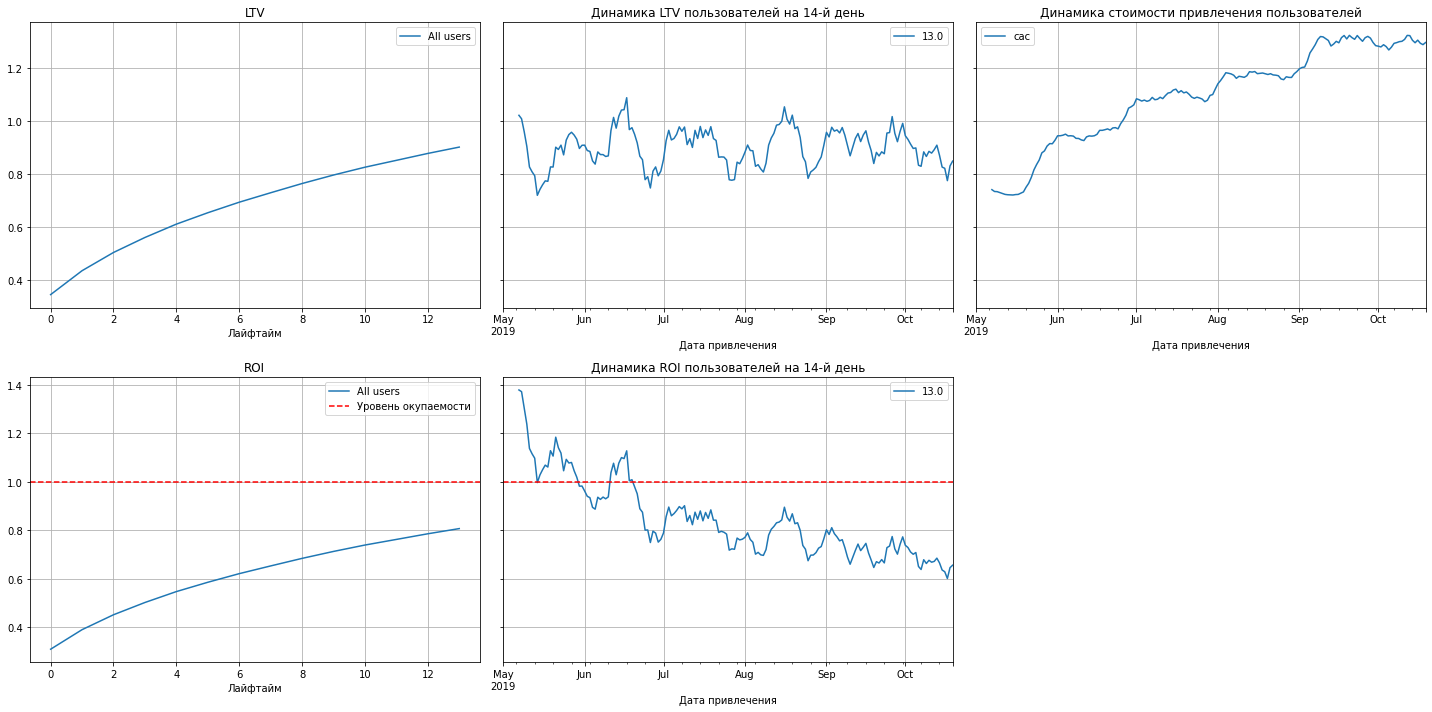

In [42]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

#строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 


По графикам можно сделать такие выводы:
- Реклама за выбранный горизонт анализа не окупается. Однако, скорее всего, на 15-й день и далее ROI перешагнет уровень окупаемости;
- Динамика CAC указывает на рост вложений в рекламу, в тоже время динамика ROI практически обратно пропорционально падает;
- На LTV влияет сезонный фактор, но и этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.

#### Конверсия

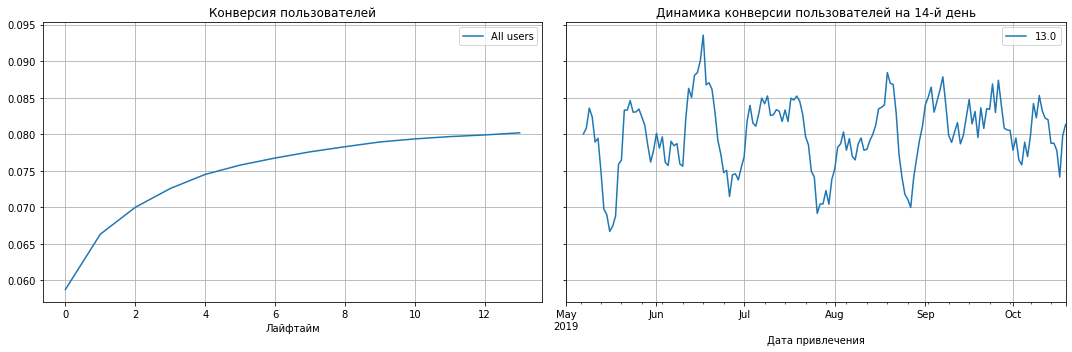

In [43]:
# смотрим конверсию

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия пользователей в целом за лайфтайм со второго дня высокая, хоть этот показатель за  горизонт анализа периодически падает, хотя к концу периода, с сентября, конверсия чуть более стабильна.

#### Удержание

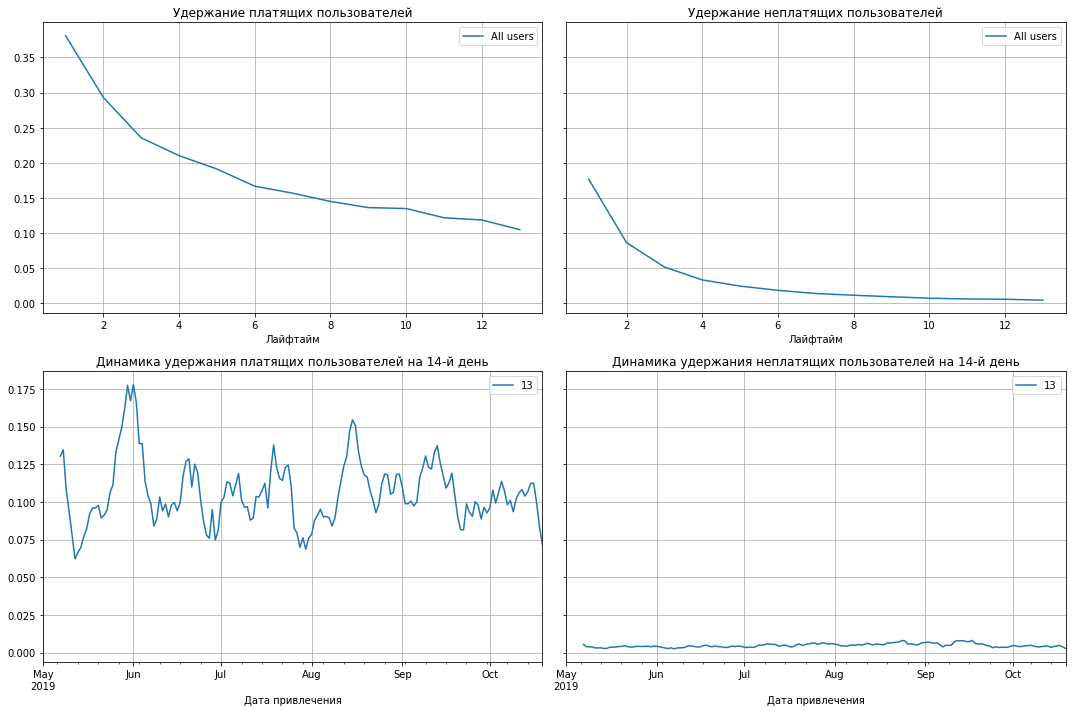

In [44]:
# смотрим удержание

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание пользователей к 14-му дню снижается, у платящих удержание значительно выше, при этом на протяжении горизонта анализа показатель значительно растет и падает, но общей тенденции к снижению нет.

Чтобы разобраться в причинах, пройдём по всем доступным характеристикам пользователей — стране, источнику и устройству первого посещения.
Начнём с разбивки по странам: передадим параметру dimensions столбец region.

#### Окупаемость с разбивкой по странам

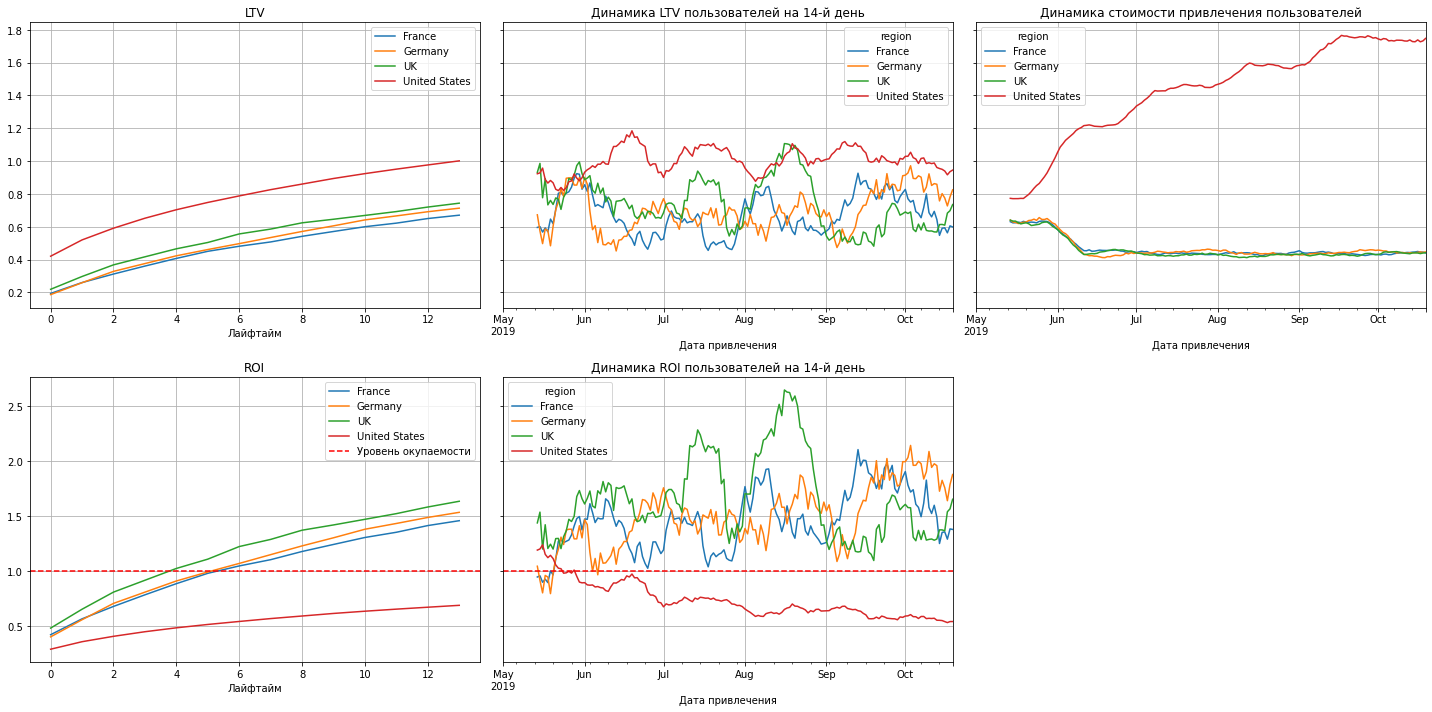

In [45]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Явно выделяются пользователи из США: стоимость их привлечения на горизонте анализа растет с июня, а динамика возврата инвестиций за этот же период и в этот же момент обратно пропорционально падает. При этом возврат инвестиций за лайфтайм стремится, но так и не достигает уровня окупаемости.


Учтем это в дальнейшем анализе.

#### Окупаемость с разбивкой по устройствам

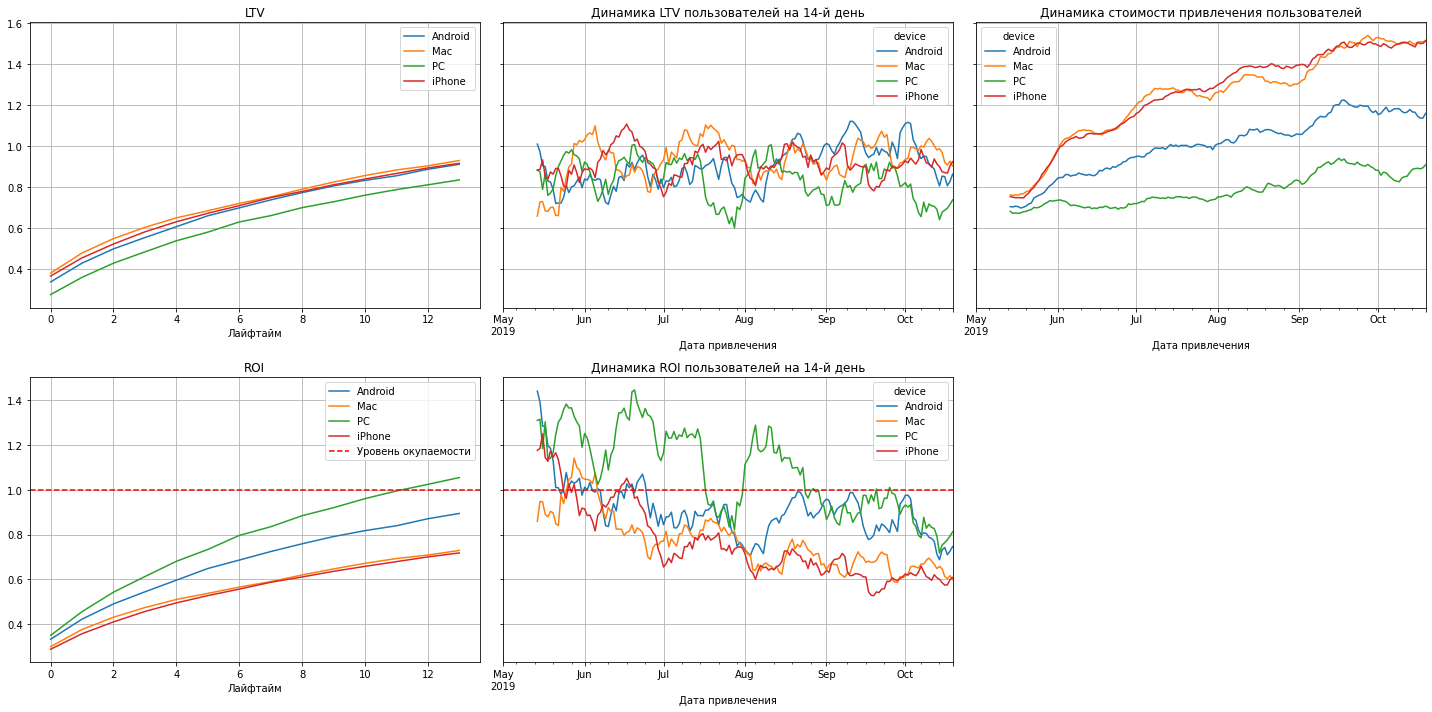

In [46]:
# смотрим окупаемость с разбивкой по устройствам
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Стоимость привлечения пользователей iPhone и Mac гораздо выше Android и PC, однако первые два устройства показывают самый низкий уровень возврата инвестиций на конец лайфтайма. Динамика ROI на горизонте анализа хоть и выбивается среди пользователей PC периодическими всплесками, но к концу периода все устройства ниже уровня окупаемости.

#### Окупаемость с разбивкой по источникам привлечения

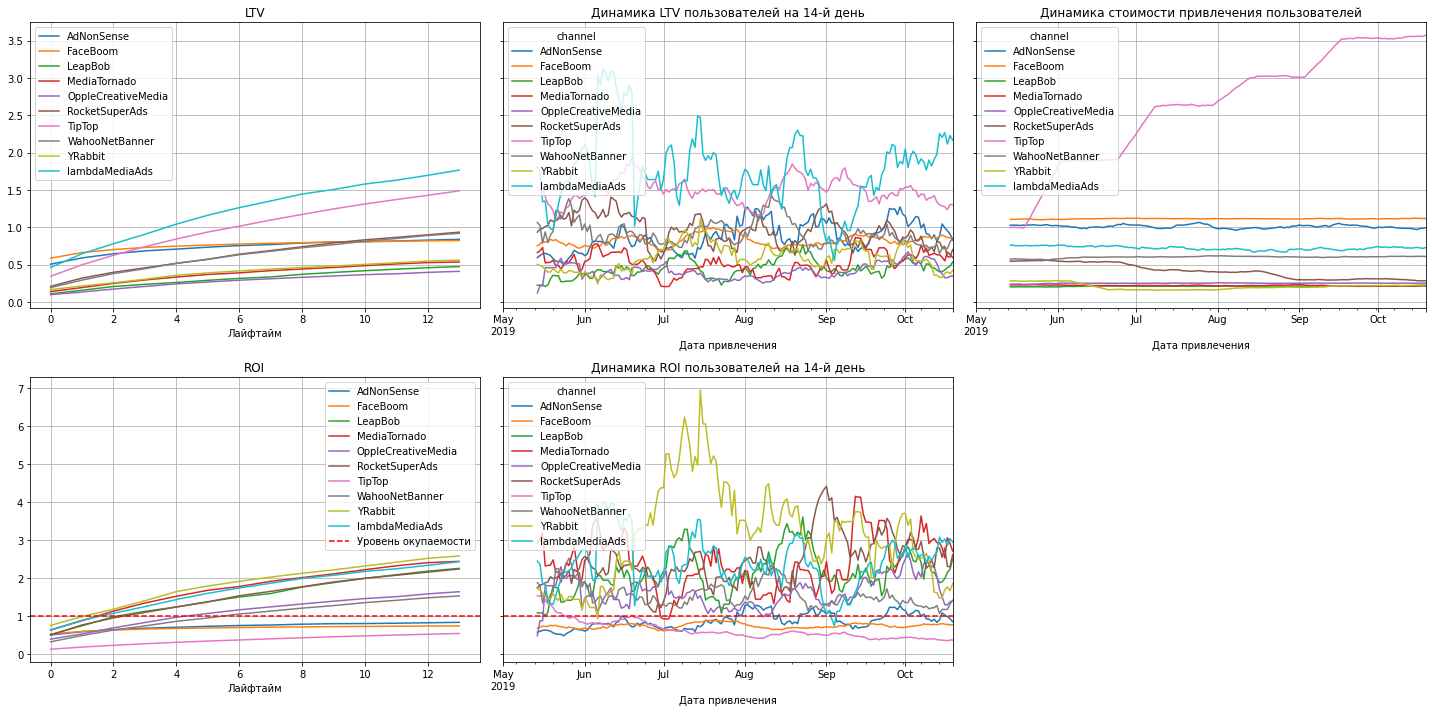

In [47]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

На протяжении всего горизонта анализа стоимость привлечения пользователей постепенно растет у канала TipTop, при этом возврат инвестиций в этот источник так и не достиг уровня окупаемости. На 14-й день не окупаются также источники "AdNonSense" и "FaceBoom", все остальные источники перешагивают уровень окупаемости на 2-6 день. 

Также можно отметить, что возврат инвестиций у источника YRabbit в июле показал мощный рост, несмотря на монотонность стоиомости привлечения пользователя, однако дальше динамика отрицательная. 

Для детального анализа построим конверсию и удержания в разбивке по источникам привлечения:

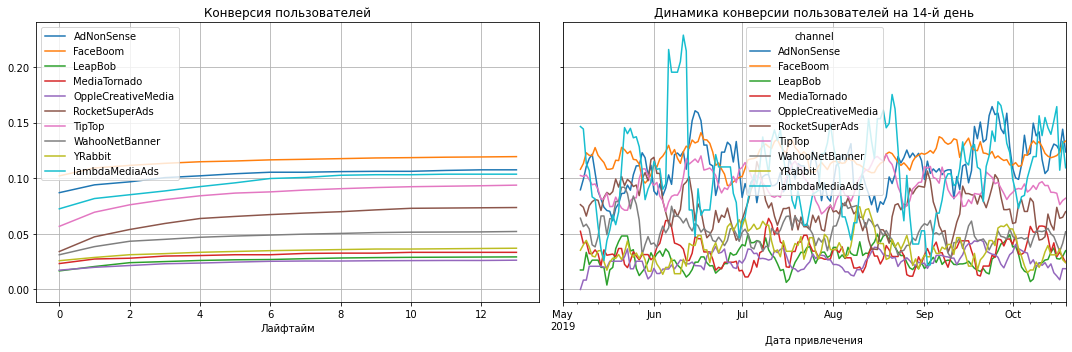

In [48]:
# смотрим конверсию в разбивке по источникам привлечения

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Лучше всех конвертируются пользователи, пришедшие из источников FaceBoom, AdNonSense и lambdaMediaAds, "дорогой" TipTop находится на четвертом месте по конверсии.

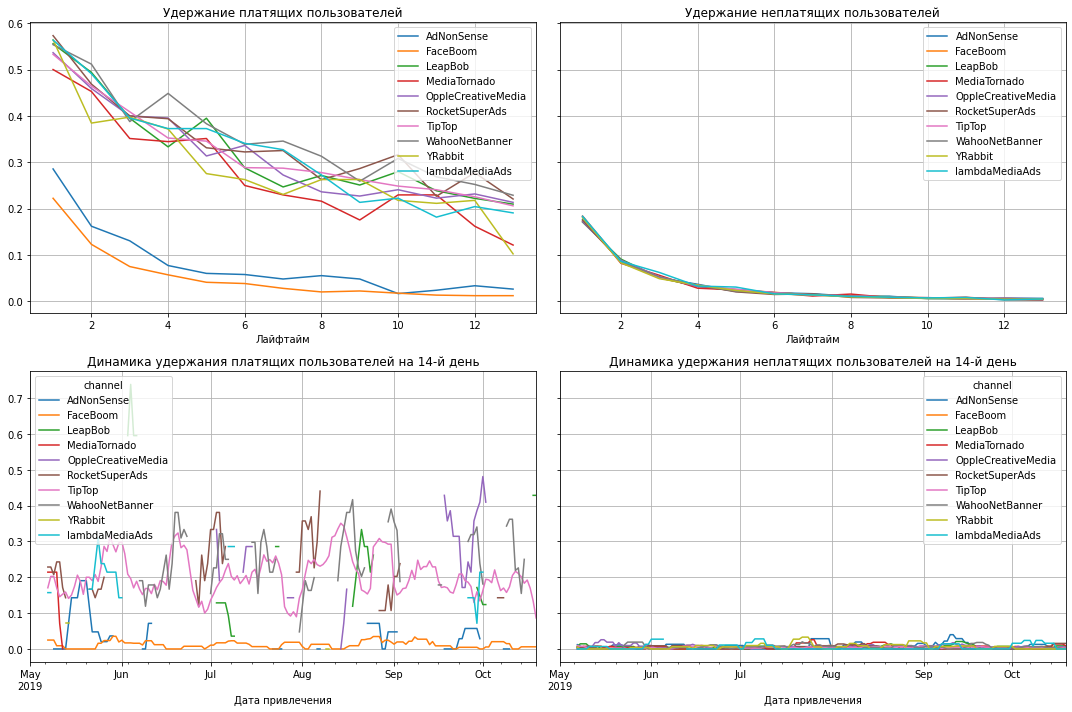

In [49]:
# смотрим удержание в разбивке по источникам привлечения

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

На первом графике видно, что FaceBoom и AdNonSense плохо удерживают платящих пользователей, что является очень важным аспектом при возврате вложенных инвестиций.

#### Ответы на вопросы

*Окупается ли реклама, направленная на привлечение пользователей в целом?*

Как видно на графике ROI в пункте 5.1, к концу второй недели пользования окупаемость рекламы составляет 80%, т.е. реклама не окупается.

*Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?*

Негативное влияние на окупаемость рекламы могут оказывать:
- устройства iPhone и Mac (к концу второй недели окупаемость на уровне 70%);
- среди стран - США и рекламных каналов - TipTop (и в том и другом случае рост инвестиций не приводит к их окупаемости).

*Чем могут быть вызваны проблемы окупаемости?*

Проблемы окупаемости могут быть вызваны нецелесообразными вложениями в неперспективные источники рекламы, а также в неактуальный для продукта регион. Как мы увидели в анализе, окупаемость к концу второй недели составила 80%, возможно, период окупаемости составляет чуть больше, чем определенный бизнес-планом период.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей. 
- Сформулируйте рекомендации для отдела маркетинга.

#### Страны

Большая часть пользователей, пришедших с рекламы, из США: 100 тыс. и среди них больший процент платящих пользователей - 7%, но стоимость привлечения пользователей из США за период значительно выросла, что привело к неокупаемости инвестиций. 
1. Для продолжения привлечения пользователей из США необходимо выбрать рекламные источники с меньшей стоимостью инвестиций. 
2. Инвестиции в рекламу в таких странах, как Франция, Германия и Великобритания окупаются на 4-6 день пользования, поэтому в дальнейшем можно пересмотреть направление инвестиций в пользу этих стран.

#### Устройства

Большая доля пользователей используют iPhone, стоимость их привлечения за период значительно выросла, что привело к неокупаемости инвестиций, та же ситуация сложилась с пользователями Mac. 
1. Для продолжения привлечения пользователей на iPhone и Mac необходимо выбрать рекламные источники с меньшей стоимостью инвестиций.
2. Следует обратить внимание на пользователей PC: инвестиции в этих пользователей окупаются на 12-й день, если перераспределить приоритеты инвестиций по устройствам, можно повысить уровень окупаемости в целом.

#### Источники рекламы

Подведем краткий итог анализа источников рекламы:

- **TipTop** - привлечено большое количество пользователей (почти 20 тыс.), из них 10% - платящие. Ушло 52% общего бюджета на рекламу за период, расходы росли в течение всего периода. Стоимость одного пользователя - 2,8. Средняя конверсия, высокий уровень удержания пользователей.


- **FaceBoom** - привлечено большое количество пользователей (29 тыс.), из них 12% - платящие. Ушел 31% общего бюджета на рекламу, практически равномерное распределен за период. Стоимость одного пользователя - 1,1. Высокая конверсия, низкий уровень удержания пользователей.


- **AdNonSense** - привлечено небольшое количество пользователей (почти 4 тыс.), из них 11% - платящие. 4% от общего бюджета на рекламу. Стоимость одного пользователя - 1,0. Высокая конверсия, низкий уровень удержания пользователей.


- **lambdaMediaAds** - привлечено небольшое количество пользователей (2 тыс.), из них 10% - платящие. 1% от общего бюджета на рекламу. Стоимость одного пользователя - 0,7. Высокая конверсия пользователей, высокий уровень удержания пользователей.


- **YRabbit** -  привлечено небольшое количество пользователей (4 тыс.), из них 4% - платящие. 1% от общего бюджета на рекламу. Стоимость одного пользователя - 0,2. Низкая конверсия пользователей, высокий уровень удержания пользователей.


- **MediaTornado** -  привлечено небольшое количество пользователей (4 тыс.), из них 4% - платящие. 1% от общего бюджета на рекламу.  Стоимость одного пользователя - 0,2. Низкая конверсия, высокий уровень удержания пользователей.


Вывод: необходимо перераспределить приоритеты инвестиций среди вышеперечисленных каналов. Наиболее важные критерии:
1. Высокий уровень удержания пользователей
2. Высокая конверсия
3. Низкая стоимость пользователя

Под вышеперечисленные критерии подходит только канал **lambdaMediaAds**, в связи с этим рекомендуется перераспределить бюджет в сторону этого источника.